In [1]:
# importing python libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing dataset
df = pd.read_csv("Groceries_dataset_csv.csv")
df.head()

,Member_number,Date,itemDescription
0,1808,21/07/2015,tropical fruit
1,2552,5/1/2015,whole milk
2,2300,19/09/2015,pip fruit
3,1187,12/12/2015,other vegetables
4,3037,1/2/2015,whole milk


In [3]:
#getting information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38006 entries, 0 to 38005
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38006 non-null  int64 
 1   Date             38006 non-null  object
 2   itemDescription  38006 non-null  object
dtypes: int64(1), object(2)
memory usage: 890.9+ KB


In [4]:
# checking for null values
df.isnull().sum().sort_values(ascending = False)

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [5]:
# changing date column to the right format
df["date"] = pd.to_datetime(df["Date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38006 entries, 0 to 38005
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38006 non-null  int64         
 1   Date             38006 non-null  object        
 2   itemDescription  38006 non-null  object        
 3   date             38006 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.2+ MB


C:\Users\Dell\AppData\Local\Temp\ipykernel_11036\159596006.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["date"] = pd.to_datetime(df["Date"])


In [6]:
df.head()

,Member_number,Date,itemDescription,date
0,1808,21/07/2015,tropical fruit,2015-07-21
1,2552,5/1/2015,whole milk,2015-01-05
2,2300,19/09/2015,pip fruit,2015-09-19
3,1187,12/12/2015,other vegetables,2015-12-12
4,3037,1/2/2015,whole milk,2015-02-01


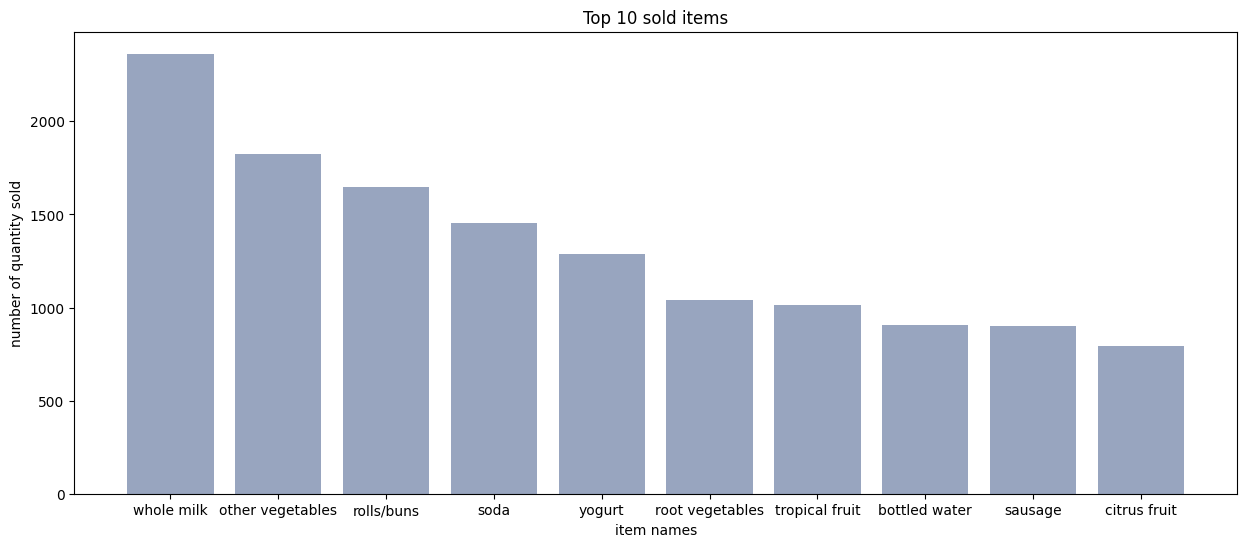

In [7]:
#plotting a bar chart to show the top 10 items sold
Item_distr = df.groupby(by = 'itemDescription').size().reset_index(name='Frequency').sort_values(by = 'Frequency', ascending = False).head(10)

bars = Item_distr["itemDescription"]
height = Item_distr["Frequency"]
x_pos = np.arange(len(bars))

plt.figure(figsize=(15,6))

plt.bar(x_pos, height, color=(0.2,0.3,0.5,0.5))

plt.title("Top 10 sold items")
plt.xlabel("item names")
plt.ylabel("number of quantity sold")

plt.xticks(x_pos, bars)

plt.show()

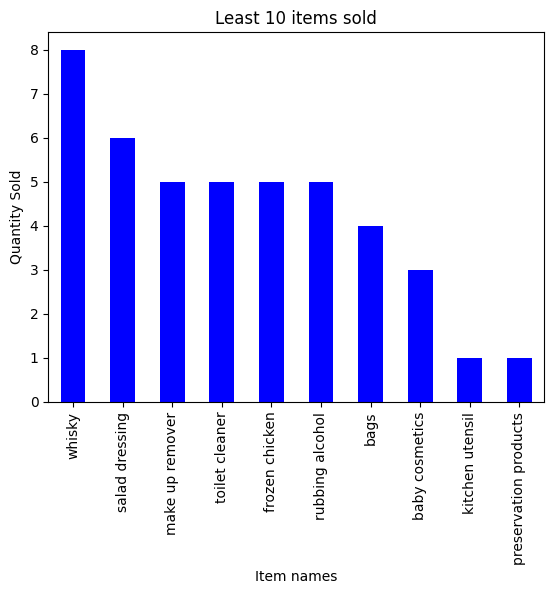

In [8]:
#plotting a bar chart to show the least 10 items sold

bot_10 = df['itemDescription'].value_counts().sort_values(ascending=False)[-10:]

bot_10.plot(kind='bar', color ='blue')
plt.title('Least 10 items sold')
plt.xlabel('Item names')
plt.ylabel('Quantity Sold')

plt.tight_layout
plt.show()


In [9]:
df_date = df.set_index(["Date"])
df_date

,Member_number,itemDescription,date
Date,,,
21/07/2015,1808,tropical fruit,2015-07-21
5/1/2015,2552,whole milk,2015-01-05
19/09/2015,2300,pip fruit,2015-09-19
12/12/2015,1187,other vegetables,2015-12-12
1/2/2015,3037,whole milk,2015-02-01
...,...,...,...
8/10/2014,4471,sliced cheese,2014-10-08
23/02/2014,2022,candy,2014-02-23
16/04/2014,1097,cake bar,2014-04-16


[Text(0.5, 0, 'date'), Text(0, 0.5, 'number of item sold')]

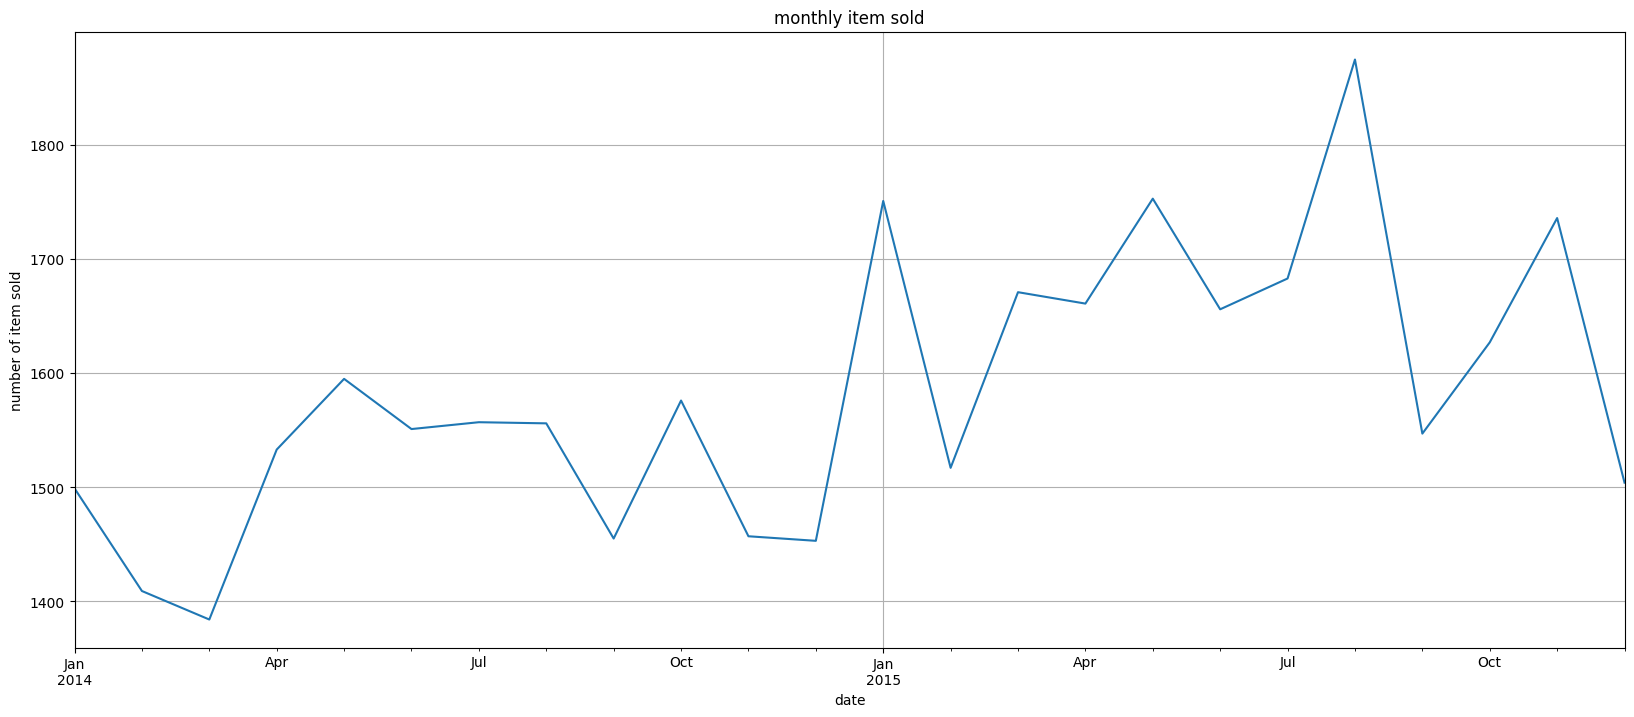

In [23]:
#plotting a line graph to show items sold by month 
df_date.resample("M")["itemDescription"].count().plot(figsize = (20,8), grid = True, title = "monthly item sold").set(xlabel="date", ylabel="number of item sold")
                                                                                                                      

In [11]:
# Create new column - Transactions
df['Transactions'] = df['Member_number'].astype(str) + "_" + df['Date'].astype(str)
df.head()

,Member_number,Date,itemDescription,date,Transactions
0,1808,21/07/2015,tropical fruit,2015-07-21,1808_21/07/2015
1,2552,5/1/2015,whole milk,2015-01-05,2552_5/1/2015
2,2300,19/09/2015,pip fruit,2015-09-19,2300_19/09/2015
3,1187,12/12/2015,other vegetables,2015-12-12,1187_12/12/2015
4,3037,1/2/2015,whole milk,2015-02-01,3037_1/2/2015


In [12]:
#checking the items purchased by a single customer
cust_level = df[["Member_number","itemDescription"]].sort_values(by = "Member_number", ascending = False)
cust_level["itemDescription"] = cust_level["itemDescription"].str.strip()
cust_level

,Member_number,itemDescription
3578,5000,soda
27422,5000,onions
25076,5000,other vegetables
19524,5000,root vegetables
9248,5000,bottled beer
...,...,...
1629,1000,soda
13239,1000,whole milk
17622,1000,pickled vegetables
6381,1000,sausage


In [13]:
transactions = [a[1]["itemDescription"].tolist() for a in list(cust_level.groupby(["Member_number"]))]

In [14]:
# Cross-tab of date and itemDescription
basket = pd.crosstab(df['Transactions'], df['itemDescription'])
basket.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Transactions,,,,,,,,,,,,,,,,,,,,,
1000_15/03/2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1000_24/06/2014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1000_24/07/2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_25/11/2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_27/05/2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# convert each element to 1 if its value is greater than 0, otherwise to 0
apriori_df = basket.applymap(lambda x: 1 if x > 0 else 0)
apriori_df

C:\Users\Dell\AppData\Local\Temp\ipykernel_11036\2809355515.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  apriori_df = basket.applymap(lambda x: 1 if x > 0 else 0)


itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Transactions,,,,,,,,,,,,,,,,,,,,,
1000_15/03/2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1000_24/06/2014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1000_24/07/2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_25/11/2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_27/05/2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999_26/12/2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4999_9/4/2014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5000_10/2/2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# Importing apriori libraries
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder


In [18]:
# Generate frequent itemsets with minimum support of 0.005 

# Generate association rules
frequent_itemsets = apriori(apriori_df, min_support=0.005, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift")
rules.sort_values(by='zhangs_metric', ascending=False).head(10)

C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
9,(other vegetables),(frankfurter),0.122101,0.037760,0.005146,0.042146,1.116150,0.000536,1.004579,0.118536
8,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150,0.000536,1.016420,0.108146
35,(yogurt),(sausage),0.085879,0.060349,0.005748,0.066926,1.108986,0.000565,1.007049,0.107508
34,(sausage),(yogurt),0.060349,0.085879,0.005748,0.095238,1.108986,0.000565,1.010345,0.104587
30,(soda),(sausage),0.097106,0.060349,0.005948,0.061253,1.014975,0.000088,1.000963,0.016341
31,(sausage),(soda),0.060349,0.097106,0.005948,0.098560,1.014975,0.000088,1.001613,0.015702
0,(bottled beer),(whole milk),0.045312,0.157923,0.007151,0.157817,0.999330,-0.000005,0.999874,-0.000702
1,(whole milk),(bottled beer),0.157923,0.045312,0.007151,0.045281,0.999330,-0.000005,0.999968,-0.000795
32,(sausage),(whole milk),0.060349,0.157923,0.008955,0.148394,0.939663,-0.000575,0.988811,-0.063965
33,(whole milk),(sausage),0.157923,0.060349,0.008955,0.056708,0.939663,-0.000575,0.996140,-0.070851


In [19]:
rules_zhang= rules[rules['zhangs_metric'] > 0]

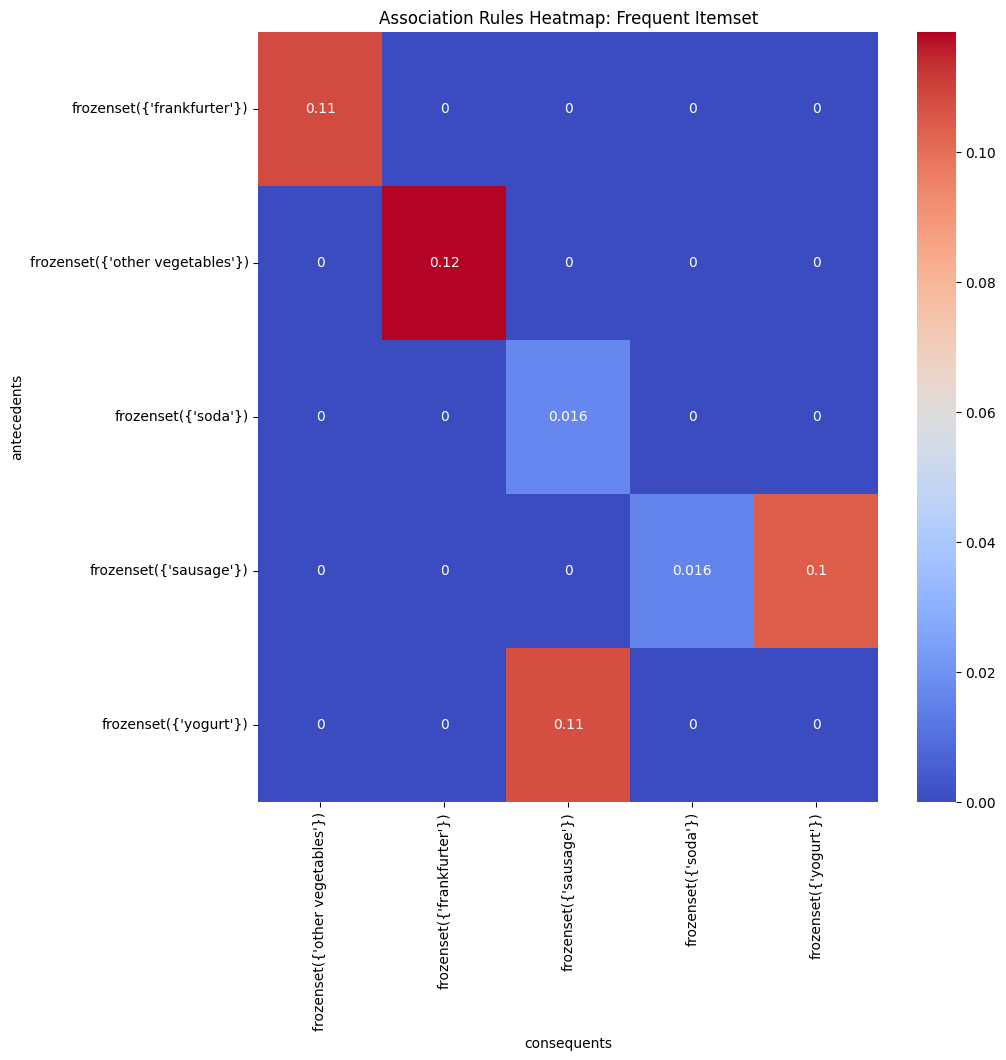

In [20]:
# Creating matrix and heatmap of association
association = rules_zhang.pivot(index='antecedents', columns='consequents', values='zhangs_metric').fillna(0)
plt.figure(figsize=(10, 10))
sns.heatmap(association, annot=True, cmap='coolwarm')
plt.title('Association Rules Heatmap: Frequent Itemset')
plt.show()